# ⚙️ **Set-up**

Run these commands in the terminal:

```console
pip install numpy
pip install pandas
pip install openpyxl
pip install datetime
pip install matplotlib
pip install missingno
```

Run the code below to import packages needed for notebook:

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import missingno as msno

# :chart_with_upwards_trend: **Import raw data**

:warning: Ensure that the current working directory is in the main folder, e.g. named 'EC1B1'. 

- Inside the main folder, it contains a data folder named `data` 
- All the raw data are under the `data` folder, named `data_spain.xlsx` and `data_united_states.xlsx`
- This notebook is in the main folder as well

**Additional note:** We were unable to find the '_Exchange rates per US dollar (Period Average)_' data under the IMF database. Hence, we used exchange rate of USD per Peseta (Spain currency) instead.

In [26]:
# Import raw data
df_spain_raw = pd.read_excel('./data/data_spain.xlsx')
df_us_raw = pd.read_excel('./data/data_united_states.xlsx')

# Save them under new variables to keep raw data 'untouched'
df_spain = df_spain_raw
df_us = df_us_raw

We now take a quick inspect at the dataframe:

In [27]:
df_spain.head()

,International Financial Statistics (IFS),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,"Economic Activity, Industrial Production, Index","Exchange Rates, US Dollar per Domestic Currenc...","International Reserves and Liquidity, Reserves...","Prices, Consumer Price Index, All items, Index"
1,Jan 1960,NaN,0.016667,233,2.857368
2,Feb 1960,NaN,0.016667,253,2.855049
3,Mar 1960,NaN,0.016667,299,2.851573
4,Apr 1960,NaN,0.016667,326,2.853891


From raw data, we can tell that:
- Titles and headers are messy
- Years are not in `datetime` format
- Missing values
- Nominal exchange rate is currently not Perseta per US dollar, but the inverse

# :broom: **Basic cleaning**

### **For Spain:**

In the code below, there are several steps that we took to clean the data. The steps are labeled as `#Step`, and the rationale for each step is explained afterwards.

In [28]:
# Step 1
df_spain = df_spain.rename(columns={
    'International Financial Statistics (IFS)': 'date', 
    'Unnamed: 1': 'spain_industrial_index', 
    'Unnamed: 2': 'spain_nominal_exchange_rate', 
    'Unnamed: 3': 'spain_reserves', 'Unnamed: 4': 'spain_price_index'}
    ) [1:]

# Step 2
df_spain['spain_nominal_exchange_rate'] = df_spain['spain_nominal_exchange_rate'].apply(lambda x: 1/x)

# Step 3
df_spain['date'] = df_spain['date'].apply(lambda x: datetime.strptime(x, '%b %Y'))

# Step 4
df_spain.iloc[:, 1:] = df_spain.iloc[:, 1:].apply(pd.to_numeric).round(2)

**<u>Explanation of steps:</u>**
- Step 1

In [30]:
df_spain.head()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index
1,1960-01-01,NaN,60.0,233.0,2.86
2,1960-02-01,NaN,60.0,253.0,2.86
3,1960-03-01,NaN,60.0,299.0,2.85
4,1960-04-01,NaN,60.0,326.0,2.85
5,1960-05-01,NaN,60.0,360.0,2.85


In [165]:
spain_basic_cleaned = 

## Using similar codes, repeat for US:

In [166]:
# Repeat first step using code from Spain
us_1 = us_1 \
    .rename(columns={'International Financial Statistics (IFS)': 'date', 'Unnamed: 1': 'us_reserves', 'Unnamed: 2': 'us_price_index'}) [1:]

# Tidy the data using similar process
us_1['date'] = us_1['date'].apply(lambda x: datetime.strptime(x, '%b %Y'))

for column in ['us_reserves', 'us_price_index']:
    us_1[column] = pd.to_numeric(us_1[column])
    us_1[column] = us_1[column].round(2)

us_basic_cleaned = us_1

In [167]:
us_basic_cleaned.head()

,date,us_reserves,us_price_index
1,1960-01-01,21478.1,13.44
2,1960-02-01,21395.7,13.48
3,1960-03-01,21344.7,13.48
4,1960-04-01,21278.0,13.53
5,1960-05-01,21234.3,13.53


# **Data manipulation**

Define real exchange rate

In [168]:
merged_1 = pd.merge(spain_basic_cleaned, us_basic_cleaned, on = 'date')

In [169]:
merged_1.head()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index
0,1960-01-01,NaN,60.0,233.0,2.86,21478.1,13.44
1,1960-02-01,NaN,60.0,253.0,2.86,21395.7,13.48
2,1960-03-01,NaN,60.0,299.0,2.85,21344.7,13.48
3,1960-04-01,NaN,60.0,326.0,2.85,21278.0,13.53
4,1960-05-01,NaN,60.0,360.0,2.85,21234.3,13.53


Create the lag variables:

In [170]:
# For Spain
merged_1['spain_nominal_exchange_rate_lag_1'] = merged_1['spain_nominal_exchange_rate'].shift(1)
merged_1['spain_price_index_lag_1'] = merged_1['spain_price_index'].shift(1)
merged_1['spain_industrial_index_lag_1'] = merged_1['spain_industrial_index'].shift(1)
merged_1['spain_industrial_index_lag_12'] = merged_1['spain_industrial_index'].shift(12)

# For US
merged_1['us_price_index_lag_1'] = merged_1['us_price_index'].shift(1)

# Save as new dataframe
merged_2 = merged_1

In [171]:
merged_2.head()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,spain_industrial_index_lag_12,us_price_index_lag_1
0,1960-01-01,NaN,60.0,233.0,2.86,21478.1,13.44,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,NaN,60.0,253.0,2.86,21395.7,13.48,60.0,2.86,NaN,NaN,13.44
2,1960-03-01,NaN,60.0,299.0,2.85,21344.7,13.48,60.0,2.86,NaN,NaN,13.48
3,1960-04-01,NaN,60.0,326.0,2.85,21278.0,13.53,60.0,2.85,NaN,NaN,13.48
4,1960-05-01,NaN,60.0,360.0,2.85,21234.3,13.53,60.0,2.85,NaN,NaN,13.53


In [172]:
merged_2['spain_nominal_exchange_rate_growth'] = (merged_2['spain_nominal_exchange_rate'] - merged_2['spain_nominal_exchange_rate_lag_1']) / merged_2['spain_nominal_exchange_rate_lag_1'] * 100
merged_2['spain_real_exchange_rate'] = merged_2['spain_nominal_exchange_rate'] * merged_2['us_price_index'] / merged_2['spain_price_index']
merged_2['spain_real_exchange_rate_lag_1'] = merged_2['spain_real_exchange_rate'].shift(1)
merged_2['spain_real_exchange_rate_growth'] = (merged_2['spain_real_exchange_rate'] - merged_2['spain_real_exchange_rate_lag_1']) / merged_2['spain_real_exchange_rate_lag_1'] * 100
merged_2['spain_inflation_rate'] = (merged_2['spain_price_index'] - merged_2['spain_price_index_lag_1']) / merged_2['spain_price_index_lag_1'] * 100
merged_2['spain_industrial_growth'] = (merged_2['spain_industrial_index'] - merged_2['spain_industrial_index_lag_1']) / merged_2['spain_industrial_index_lag_1'] * 100
merged_2['spain_industrial_yearly_growth'] = (merged_2['spain_industrial_index'] - merged_2['spain_industrial_index_lag_12']) / merged_2['spain_industrial_index_lag_12'] * 100
merged_2['us_inflation_rate'] = (merged_2['us_price_index'] - merged_2['us_price_index_lag_1']) / merged_2['us_price_index_lag_1'] * 100
merged_3 = merged_2
merged_3.head()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,spain_industrial_index_lag_12,us_price_index_lag_1,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate
0,1960-01-01,NaN,60.0,233.0,2.86,21478.1,13.44,NaN,NaN,NaN,NaN,NaN,NaN,281.958042,NaN,NaN,NaN,NaN,NaN,NaN
1,1960-02-01,NaN,60.0,253.0,2.86,21395.7,13.48,60.0,2.86,NaN,NaN,13.44,0.0,282.797203,281.958042,0.297619,0.00000,NaN,NaN,0.297619
2,1960-03-01,NaN,60.0,299.0,2.85,21344.7,13.48,60.0,2.86,NaN,NaN,13.48,0.0,283.789474,282.797203,0.350877,-0.34965,NaN,NaN,0.000000
3,1960-04-01,NaN,60.0,326.0,2.85,21278.0,13.53,60.0,2.85,NaN,NaN,13.48,0.0,284.842105,283.789474,0.370920,0.00000,NaN,NaN,0.370920
4,1960-05-01,NaN,60.0,360.0,2.85,21234.3,13.53,60.0,2.85,NaN,NaN,13.53,0.0,284.842105,284.842105,0.000000,0.00000,NaN,NaN,0.000000


In [173]:
spain_index_list = []
us_index_list = []
spain_first_value = merged_3.loc[0, 'spain_reserves']
us_first_value = merged_3.loc[0, 'us_reserves']

for value in merged_3['spain_reserves']:
    if value != None:
        index = value / spain_first_value * 100
    else:
        index = None

    spain_index_list.append(index)

for value in merged_3['us_reserves']:
    if value != None:
        index = value / us_first_value * 100
    else:
        index = None

    us_index_list.append(index)

merged_3['spain_reserves_index_1960'] = spain_index_list
merged_3['us_reserves_index_1960'] = us_index_list
merged_3 = merged_3.round(2)
merged_4 = merged_3
merged_4.head()

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
0,1960-01-01,NaN,60.0,233.0,2.86,21478.1,13.44,NaN,NaN,NaN,...,NaN,281.96,NaN,NaN,NaN,NaN,NaN,NaN,100.00,100.00
1,1960-02-01,NaN,60.0,253.0,2.86,21395.7,13.48,60.0,2.86,NaN,...,0.0,282.80,281.96,0.30,0.00,NaN,NaN,0.30,108.58,99.62
2,1960-03-01,NaN,60.0,299.0,2.85,21344.7,13.48,60.0,2.86,NaN,...,0.0,283.79,282.80,0.35,-0.35,NaN,NaN,0.00,128.33,99.38
3,1960-04-01,NaN,60.0,326.0,2.85,21278.0,13.53,60.0,2.85,NaN,...,0.0,284.84,283.79,0.37,0.00,NaN,NaN,0.37,139.91,99.07
4,1960-05-01,NaN,60.0,360.0,2.85,21234.3,13.53,60.0,2.85,NaN,...,0.0,284.84,284.84,0.00,0.00,NaN,NaN,0.00,154.51,98.86


In [174]:
df = merged_4

In [175]:
df.columns

Index(['date', 'spain_industrial_index', 'spain_nominal_exchange_rate',
       'spain_reserves', 'spain_price_index', 'us_reserves', 'us_price_index',
       'spain_nominal_exchange_rate_lag_1', 'spain_price_index_lag_1',
       'spain_industrial_index_lag_1', 'spain_industrial_index_lag_12',
       'us_price_index_lag_1', 'spain_nominal_exchange_rate_growth',
       'spain_real_exchange_rate', 'spain_real_exchange_rate_lag_1',
       'spain_real_exchange_rate_growth', 'spain_inflation_rate',
       'spain_industrial_growth', 'spain_industrial_yearly_growth',
       'us_inflation_rate', 'spain_reserves_index_1960',
       'us_reserves_index_1960'],
      dtype='object')

In [212]:
df.dtypes

date                                  datetime64[ns]
spain_industrial_index                       float64
spain_nominal_exchange_rate                  float64
spain_reserves                               float64
spain_price_index                            float64
us_reserves                                  float64
us_price_index                               float64
spain_nominal_exchange_rate_lag_1            float64
spain_price_index_lag_1                      float64
spain_industrial_index_lag_1                 float64
spain_industrial_index_lag_12                float64
us_price_index_lag_1                         float64
spain_nominal_exchange_rate_growth           float64
spain_real_exchange_rate                     float64
spain_real_exchange_rate_lag_1               float64
spain_real_exchange_rate_growth              float64
spain_inflation_rate                         float64
spain_industrial_growth                      float64
spain_industrial_yearly_growth               f

Inspect if dataframe has missing values:

<Axes: >

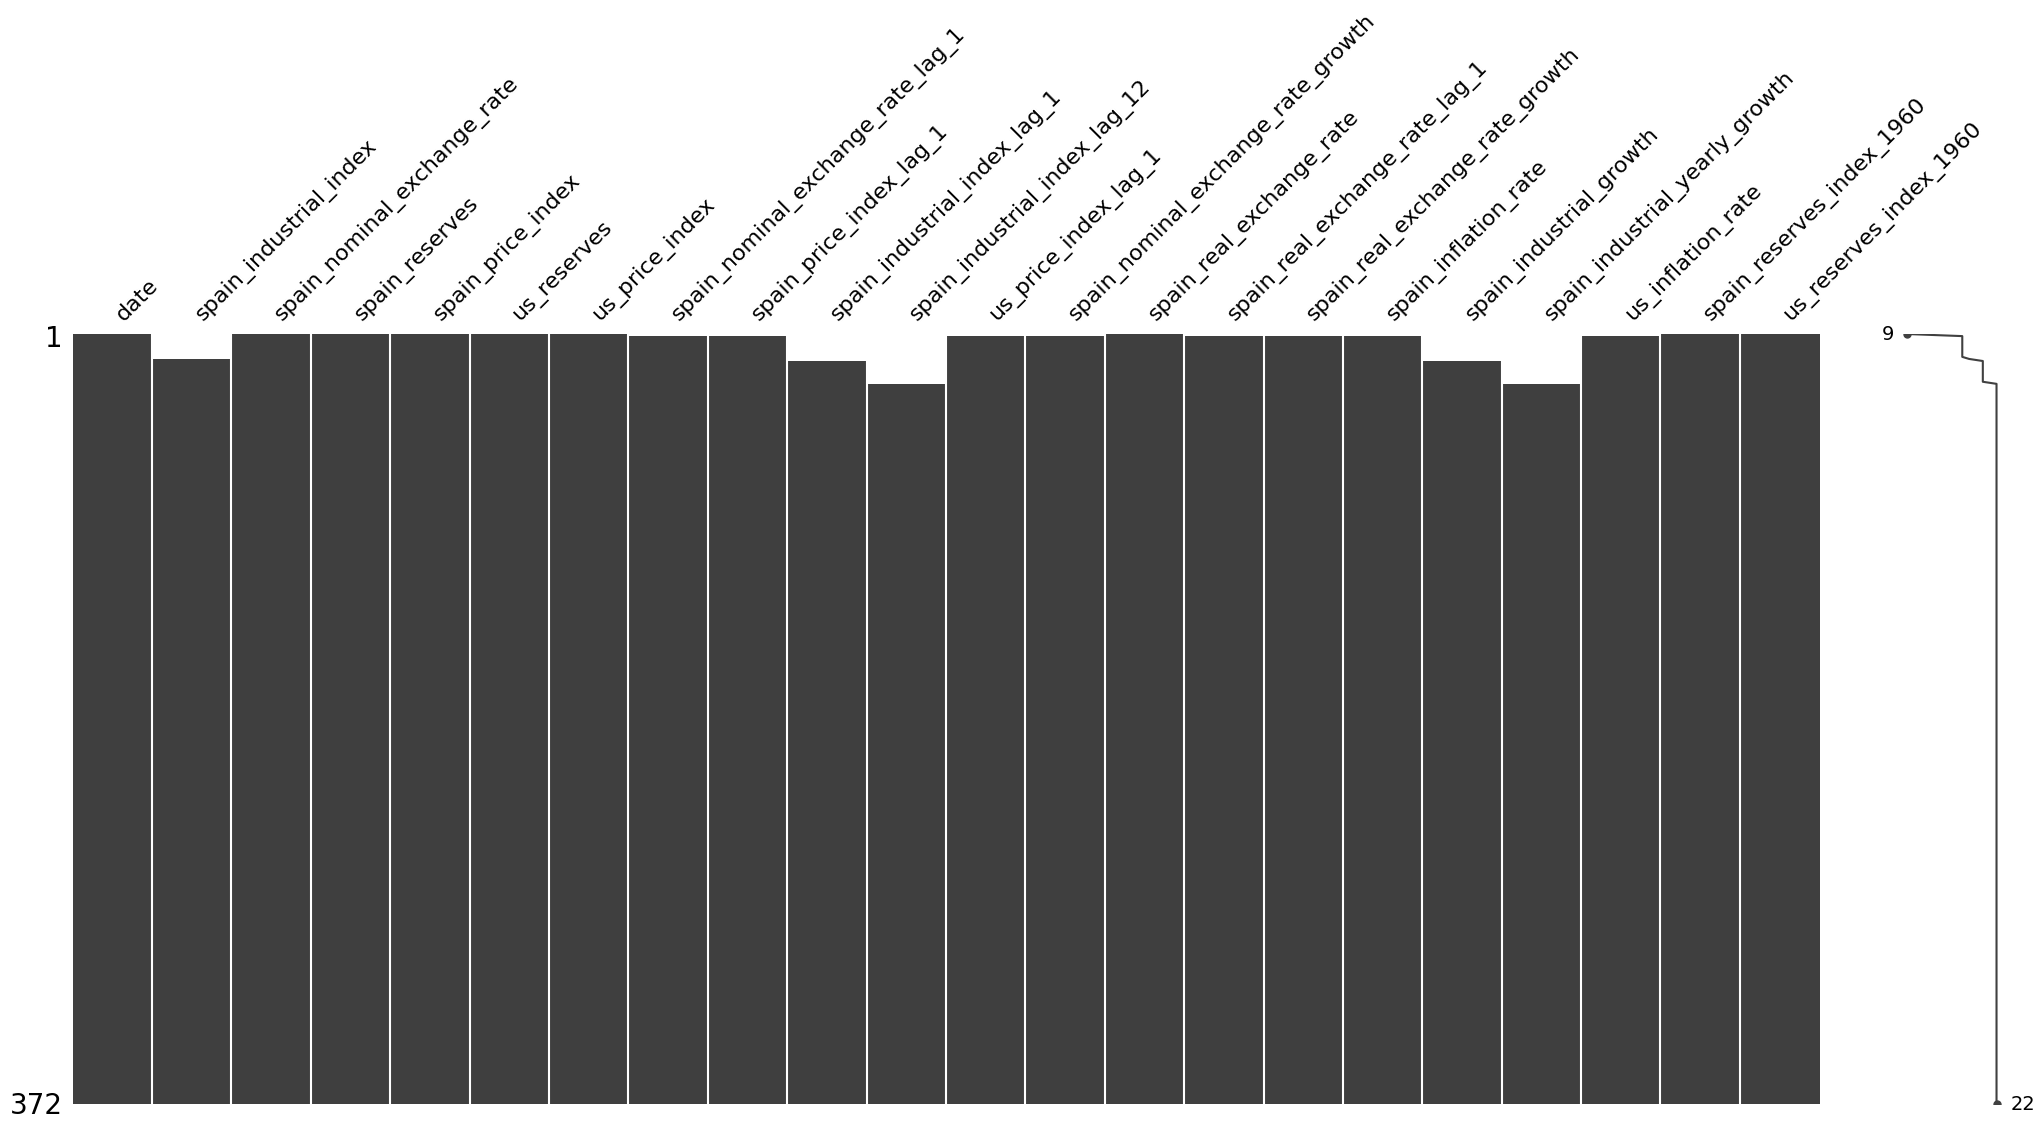

In [176]:
msno.matrix(df)

Code used to figure out outliers

```python
for item in df.columns[1:]:
    plt.figure()
    plt.hist(df[item], bins=50, edgecolor='white')
    plt.title(str(item))
```

Missing values are reasonable

Some distributions are not normal

These are "outliers"

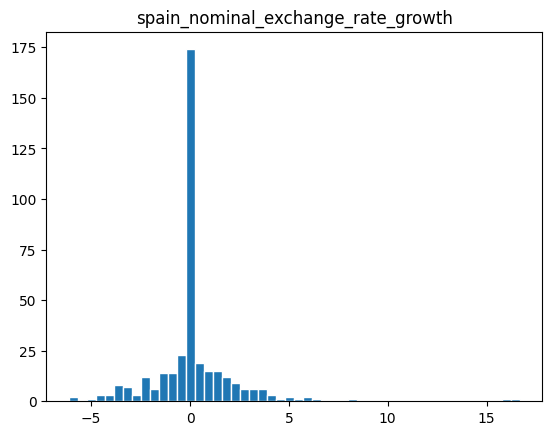

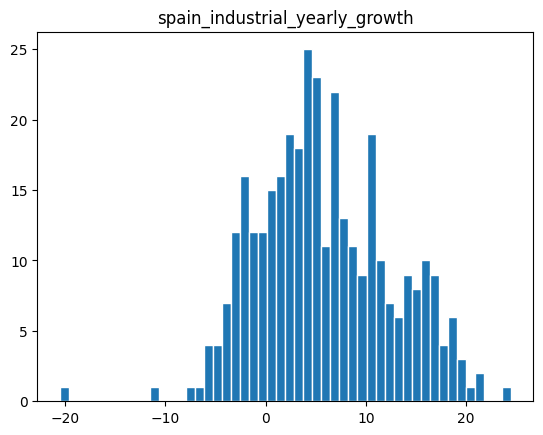

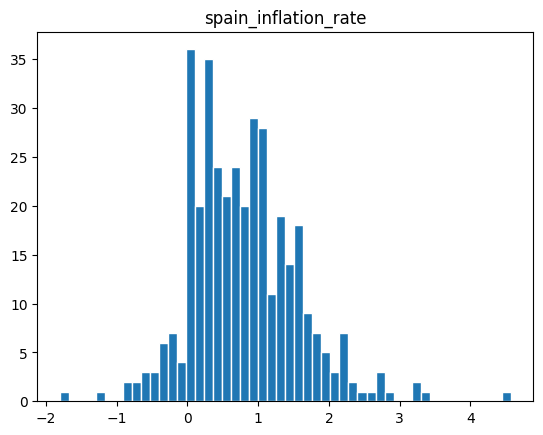

In [192]:
factors_to_inspect = ['spain_nominal_exchange_rate_growth', 'spain_industrial_yearly_growth', 'spain_inflation_rate']

for factor in factors_to_inspect:
    plt.figure()
    plt.hist(df[factor], bins=50, edgecolor='white')
    plt.title(str(factor))

In [201]:
def determine_outlier_year(df, column_name, value, greater=True):
    if greater:
        df_filtered = df[df[column_name] > value]
    else:
        df_filtered = df[df[column_name] < value]

    return df_filtered

they changed the peg

In [209]:
determine_outlier_year(df, 'spain_nominal_exchange_rate_growth', 10)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
94,1967-11-01,37.19,70.00,1032.01,4.69,15437.60,15.50,60.00,4.59,35.99,...,16.67,231.34,201.96,14.55,2.18,3.33,1.64,0.32,442.92,71.88
210,1977-07-01,71.54,80.52,4634.96,13.49,18926.99,27.97,69.31,13.06,77.19,...,16.17,166.95,147.75,13.00,3.29,-7.32,-3.56,0.47,1989.25,88.12


In [210]:
determine_outlier_year(df, 'spain_industrial_yearly_growth', -15, greater=False)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
187,1975-08-01,46.41,58.33,6485.82,9.27,16116.68,24.9,57.25,9.12,66.46,...,1.89,156.68,156.06,0.4,1.64,-30.17,-20.54,0.16,2783.61,75.04


In [211]:
determine_outlier_year(df, 'spain_inflation_rate', 4)

,date,spain_industrial_index,spain_nominal_exchange_rate,spain_reserves,spain_price_index,us_reserves,us_price_index,spain_nominal_exchange_rate_lag_1,spain_price_index_lag_1,spain_industrial_index_lag_1,...,spain_nominal_exchange_rate_growth,spain_real_exchange_rate,spain_real_exchange_rate_lag_1,spain_real_exchange_rate_growth,spain_inflation_rate,spain_industrial_growth,spain_industrial_yearly_growth,us_inflation_rate,spain_reserves_index_1960,us_reserves_index_1960
196,1976-05-01,74.84,67.63,5528.04,10.75,17955.33,25.91,67.27,10.28,73.42,...,0.54,163.0,168.37,-3.19,4.57,1.93,6.58,0.7,2372.55,83.6


In [178]:
# df.to_excel('test_data.xlsx', index=False, engine='openpyxl')

# **5.3.1**

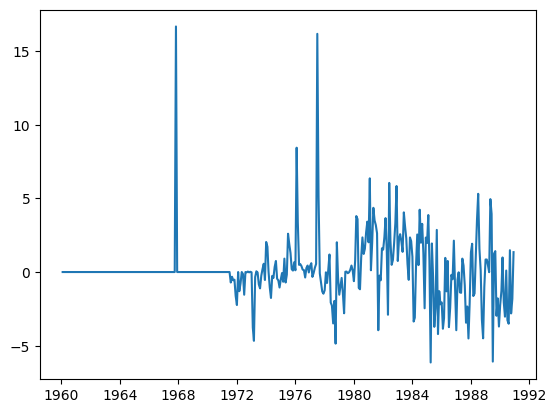

In [179]:
plt.plot(df['date'], df['spain_nominal_exchange_rate_growth'])

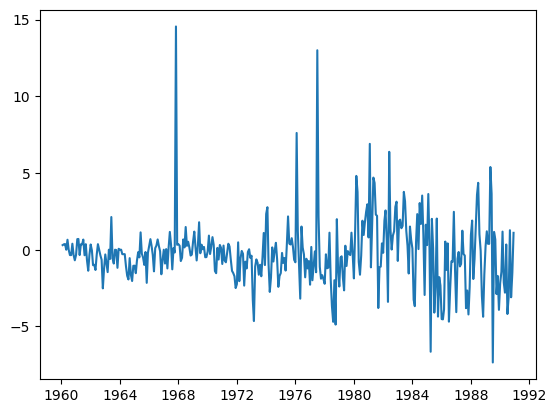

In [180]:
plt.plot(df['date'], df['spain_real_exchange_rate_growth'])

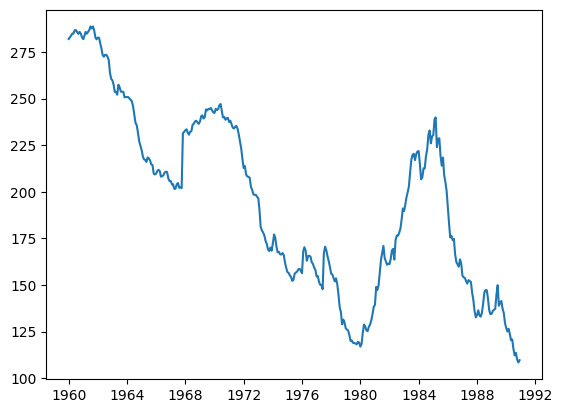

In [181]:
plt.plot(df['date'], df['spain_real_exchange_rate'])

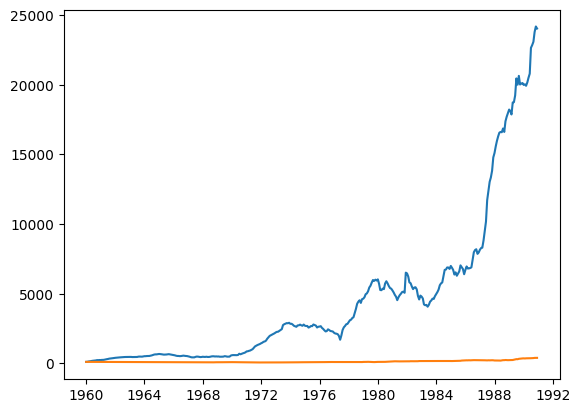

In [182]:
# Remember change to until 1973
plt.plot(df['date'], df['spain_reserves_index_1960'])
plt.plot(df['date'], df['us_reserves_index_1960'])

# **5.3.2**

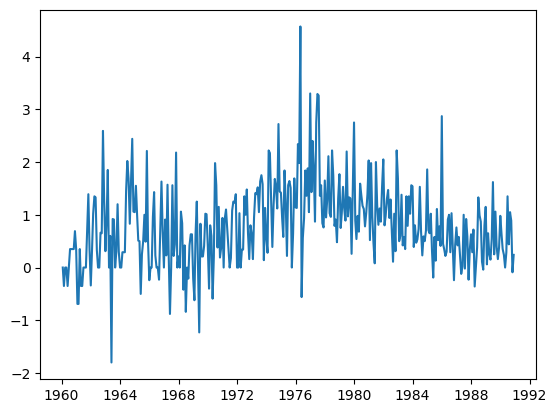

In [183]:
plt.plot(df['date'], df['spain_inflation_rate'])

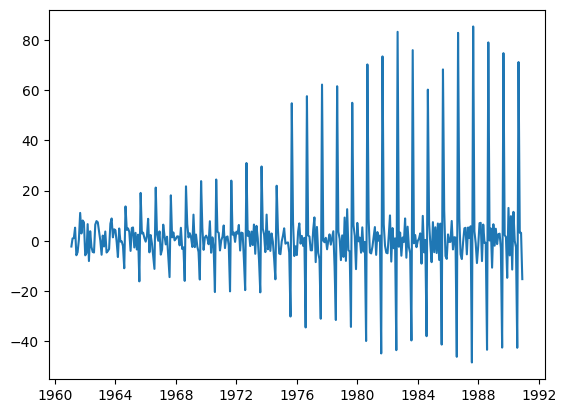

In [184]:
plt.plot(df['date'], df['spain_industrial_growth'])

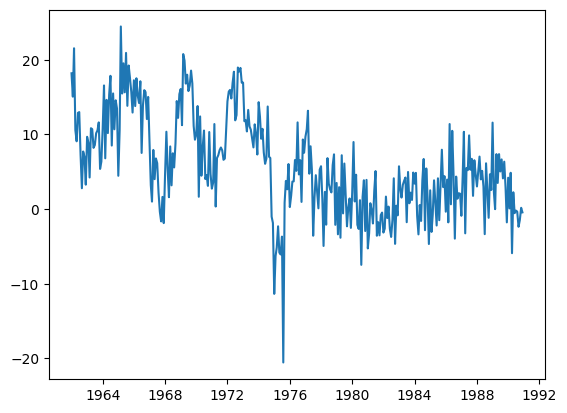

In [185]:
plt.plot(df['date'], df['spain_industrial_yearly_growth'])

# **5.3.3**

In [219]:
df['us_minus_spain_inflation'] = df['us_inflation_rate'] - df['spain_inflation_rate']

In [220]:
df_before = df[df['date'] <= pd.to_datetime('1971-07-01')]
df_after = df[df['date'] >= pd.to_datetime('1973-01-01')]

In [237]:
std_factors = ['spain_nominal_exchange_rate_growth', 'spain_real_exchange_rate_growth', 'spain_inflation_rate', 'us_minus_spain_inflation', 'spain_industrial_yearly_growth']

std_values = {'before': {}, 'after': {}}

for dataframe in [df_before, df_after]:
    for factor in std_factors:
        factor_std = dataframe[factor].std()  # Calculate standard deviation and round to two decimal places
        std_values['before' if dataframe is df_before else 'after'][factor] = factor_std  # Store standard deviation with factor name as key

# Convert std_values dictionary to DataFrame
std_df = pd.DataFrame(std_values)
std_df['ratio (after/before)'] = std_df['after'] / std_df['before']
std_df = std_df.round(2)

print("Standard deviations:")
print(std_df)

Standard deviations:
                                    before  after  ratio (after/before)
spain_nominal_exchange_rate_growth    1.42   2.58                  1.81
spain_real_exchange_rate_growth       1.48   2.53                  1.72
spain_inflation_rate                  0.73   0.74                  1.02
us_minus_spain_inflation              0.79   0.75                  0.95
spain_industrial_yearly_growth        5.69   5.05                  0.89
